# Logistic Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the Dataset 

In [2]:
import pandas as pd 
df=pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Checak vales for counts for species 

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: title={'center': 'countplot for species'}, xlabel='species'>

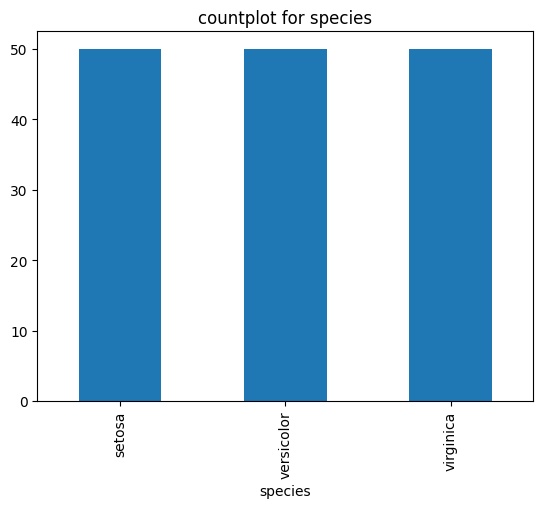

In [7]:
df['species'].value_counts().plot(kind = 'bar',title ='countplot for species')



## Sepraet  X adn Y (species)

In [8]:
X=df.drop(columns=['species'])
Y=df[['species']]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head(
    
)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Lable encode the species 

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y['species']=le.fit_transform(Y['species'])

In [12]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [13]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

## Preprocessing for X features 

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
## NUMERICAL Pipeline 
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [16]:
 x_pre = num_pipe.fit_transform(X)

In [17]:
x_pre[0:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [18]:
cols=num_pipe.get_feature_names_out()

In [19]:
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [20]:
X_pre = pd.DataFrame(x_pre,columns=cols)

In [21]:
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Train Test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.33, random_state=42)

In [23]:
xtrain.shape

(100, 4)

In [24]:
xtest.shape

(50, 4)

# Build a Logistic Regression

In [25]:
from  sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
# Acurracy in  training 
model.score(xtrain,ytrain)

0.96

In [27]:
# Accuracy in testing 
model.score(xtest,ytest)

0.98

## Predicting the values for new data 

In [28]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [29]:
ypred_tr[0:5]

array([1, 2, 1, 0, 2])

In [30]:
ytrain.head()

,species
96,1
105,2
66,1
0,0
122,2


In [31]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

In [32]:
ytest.head()

,species
73,1
18,0
118,2
78,1
76,1


## Ploting confusion matrix for test data

TypeError: unsupported format string passed to type.__format__

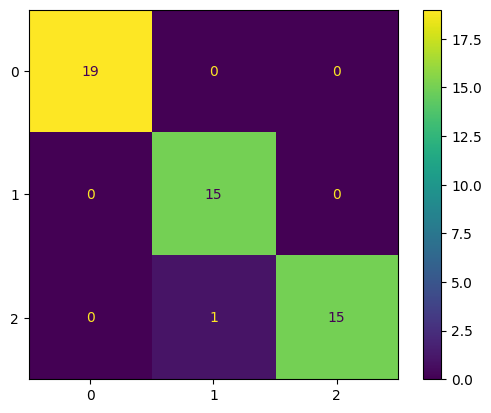

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf= confusion_matrix(ytest , ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels= model.__class__)
cfd.plot()

